<a href="https://colab.research.google.com/github/yashshroff99/College-Projects/blob/main/Assignment3_nnfl_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahanmr98","key":"f56952fb46bc0b70fb693f16bbf162f4"}'}

In [ ]:
!mkdir -p ~/.kaggle

!pip install -U kaggle

!cp kaggle.json ~/.kaggle

!chmod 600 /root/.kaggle/kaggle.json

!kaggle competitions download -c nnfl-assignment-3

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)
  0% 0.00/146k [00:00<?, ?B/s]
100% 146k/146k [00:00<00:00, 46.0MB/s]
  0% 0.00/9.75k [00:00<?, ?B/s]
100% 9.75k/9.75k [00:00<00:00, 8.10MB/s]
  0% 0.00/0.98M [00:00<?, ?B/s]
100% 0.98M/0.98M [00:00<00:00, 65.9MB/s]


In [ ]:
import pandas as pd
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [ ]:
train.head()

,ID,Text,Class
0,7303,"""Please enable removing language code from the...",1
1,5258,"""Note: in your .csproj file, there is a Suppor...",0
2,6218,"""Wich means the new version not fully replaced...",0
3,3076,"""Some of my users will still receive the old x...",0
4,6508,"""The store randomly gives the old xap or the n...",0


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from bs4 import BeautifulSoup
import re

#TQDM is a progress bar library with good support for nested loops and Jupyter/IPython notebooks.
from tqdm import tqdm

In [ ]:
from keras.utils import to_categorical
import random
from tensorflow import set_random_seed
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense,Dropout,Embedding,LSTM,Bidirectional,TimeDistributed
from keras.callbacks import EarlyStopping
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.models import Sequential

Using TensorFlow backend.


In [ ]:
def clean_sentences(df):
    reviews = []

    for sent in tqdm(df['Text']):

        #remove html content
        review_text = BeautifulSoup(sent).get_text()

        #remove non-alphabetic characters
        review_text = re.sub("[^a-zA-Z]"," ", review_text)

        #tokenize the sentences
        words = word_tokenize(review_text.lower())

        #lemmatize each word to its lemma
        lemma_words = [lemmatizer.lemmatize(i) for i in words]

        reviews.append(lemma_words)

    return(reviews)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#cleaned reviews for both train and test set retrieved
train_sentences = clean_sentences(train)
test_sentences = clean_sentences(test)
print(len(train_sentences))
print(len(test_sentences))

100%|██████████| 1425/1425 [00:00<00:00, 2553.82it/s]

8500
1425


In [ ]:
train_sentences

[['please',
  'enable',
  'removing',
  'language',
  'code',
  'from',
  'the',
  'dev',
  'center',
  'language',
  'history',
  'for',
  'example',
  'if',
  'you',
  'ever',
  'selected',
  'ru',
  'and',
  'ru',
  'ru',
  'laguages',
  'and',
  'you',
  'published',
  'this',
  'xap',
  'to',
  'the',
  'store',
  'then',
  'it',
  'cause',
  'tile',
  'localization',
  'to',
  'show',
  'the',
  'en',
  'u',
  'default',
  'tile',
  'localization',
  'which',
  'is',
  'bad'],
 ['note',
  'in',
  'your',
  'csproj',
  'file',
  'there',
  'is',
  'a',
  'supportedcultures',
  'entry',
  'like',
  'this',
  'de',
  'de',
  'ru',
  'ru',
  'ru',
  'when',
  'i',
  'removed',
  'the',
  'ru',
  'language',
  'code',
  'and',
  'published',
  'my',
  'new',
  'xap',
  'version',
  'the',
  'old',
  'xap',
  'version',
  'still',
  'remains',
  'in',
  'the',
  'store',
  'with',
  'replaced',
  'and',
  'unpublished'],
 ['wich',
  'mean',
  'the',
  'new',
  'version',
  'not',
  'fu

In [ ]:
target=train.Class.values
y_target=to_categorical(target)
num_classes=y_target.shape[1]

In [ ]:
train_sentences

[['please',
  'enable',
  'removing',
  'language',
  'code',
  'from',
  'the',
  'dev',
  'center',
  'language',
  'history',
  'for',
  'example',
  'if',
  'you',
  'ever',
  'selected',
  'ru',
  'and',
  'ru',
  'ru',
  'laguages',
  'and',
  'you',
  'published',
  'this',
  'xap',
  'to',
  'the',
  'store',
  'then',
  'it',
  'cause',
  'tile',
  'localization',
  'to',
  'show',
  'the',
  'en',
  'u',
  'default',
  'tile',
  'localization',
  'which',
  'is',
  'bad'],
 ['note',
  'in',
  'your',
  'csproj',
  'file',
  'there',
  'is',
  'a',
  'supportedcultures',
  'entry',
  'like',
  'this',
  'de',
  'de',
  'ru',
  'ru',
  'ru',
  'when',
  'i',
  'removed',
  'the',
  'ru',
  'language',
  'code',
  'and',
  'published',
  'my',
  'new',
  'xap',
  'version',
  'the',
  'old',
  'xap',
  'version',
  'still',
  'remains',
  'in',
  'the',
  'store',
  'with',
  'replaced',
  'and',
  'unpublished'],
 ['wich',
  'mean',
  'the',
  'new',
  'version',
  'not',
  'fu

In [ ]:
X_train,X_val,y_train,y_val=train_test_split(train_sentences,y_target,test_size=0.2,stratify=y_target)

In [ ]:
X_train

[['though',
  'this',
  'idea',
  'ha',
  'been',
  'expressed',
  'to',
  'varying',
  'degree',
  'with',
  'regard',
  'to',
  'specific',
  'service',
  'like',
  'google',
  'translate',
  'i',
  've',
  'not',
  'seen',
  'it',
  'expressed',
  'generally'],
 ['but',
  'look',
  'what',
  'happens',
  'when',
  'i',
  'try',
  'note',
  'the',
  'lower',
  'case',
  'i',
  'to',
  'use',
  'the',
  'auto',
  'complete',
  'which',
  'is',
  'set',
  'to',
  'add',
  'a',
  'space',
  'after',
  'being',
  'used',
  'it',
  'won',
  't',
  'subsequently',
  'recognise',
  'the',
  'double',
  'space',
  'like',
  'so',
  'this',
  'should',
  'be',
  'new',
  'sentence',
  'but',
  'instead',
  'i',
  'have',
  'three',
  'space'],
 ['if',
  'for',
  'some',
  'reason',
  'your',
  'p',
  'invoke',
  'doe',
  'not',
  'satisfy',
  'those',
  'requirement',
  'please',
  'use',
  'dllimport',
  'exactspelling',
  'true',
  'to',
  'indicate',
  'that',
  'you',
  'understand',
  't

In [ ]:
#It is needed for initializing tokenizer of keras and subsequent padding

unique_words = set()
len_max = 0

for sent in tqdm(X_train):

    unique_words.update(sent)

    if(len_max<len(sent)):
        len_max = len(sent)

#length of the list of unique_words gives the no of unique words
print(len(list(unique_words)))
print(len_max)

100%|██████████| 6800/6800 [00:00<00:00, 372763.68it/s]

7435
198


In [ ]:
X_train

[['though',
  'this',
  'idea',
  'ha',
  'been',
  'expressed',
  'to',
  'varying',
  'degree',
  'with',
  'regard',
  'to',
  'specific',
  'service',
  'like',
  'google',
  'translate',
  'i',
  've',
  'not',
  'seen',
  'it',
  'expressed',
  'generally'],
 ['but',
  'look',
  'what',
  'happens',
  'when',
  'i',
  'try',
  'note',
  'the',
  'lower',
  'case',
  'i',
  'to',
  'use',
  'the',
  'auto',
  'complete',
  'which',
  'is',
  'set',
  'to',
  'add',
  'a',
  'space',
  'after',
  'being',
  'used',
  'it',
  'won',
  't',
  'subsequently',
  'recognise',
  'the',
  'double',
  'space',
  'like',
  'so',
  'this',
  'should',
  'be',
  'new',
  'sentence',
  'but',
  'instead',
  'i',
  'have',
  'three',
  'space'],
 ['if',
  'for',
  'some',
  'reason',
  'your',
  'p',
  'invoke',
  'doe',
  'not',
  'satisfy',
  'those',
  'requirement',
  'please',
  'use',
  'dllimport',
  'exactspelling',
  'true',
  'to',
  'indicate',
  'that',
  'you',
  'understand',
  't

In [ ]:
X_train

[['though',
  'this',
  'idea',
  'ha',
  'been',
  'expressed',
  'to',
  'varying',
  'degree',
  'with',
  'regard',
  'to',
  'specific',
  'service',
  'like',
  'google',
  'translate',
  'i',
  've',
  'not',
  'seen',
  'it',
  'expressed',
  'generally'],
 ['but',
  'look',
  'what',
  'happens',
  'when',
  'i',
  'try',
  'note',
  'the',
  'lower',
  'case',
  'i',
  'to',
  'use',
  'the',
  'auto',
  'complete',
  'which',
  'is',
  'set',
  'to',
  'add',
  'a',
  'space',
  'after',
  'being',
  'used',
  'it',
  'won',
  't',
  'subsequently',
  'recognise',
  'the',
  'double',
  'space',
  'like',
  'so',
  'this',
  'should',
  'be',
  'new',
  'sentence',
  'but',
  'instead',
  'i',
  'have',
  'three',
  'space'],
 ['if',
  'for',
  'some',
  'reason',
  'your',
  'p',
  'invoke',
  'doe',
  'not',
  'satisfy',
  'those',
  'requirement',
  'please',
  'use',
  'dllimport',
  'exactspelling',
  'true',
  'to',
  'indicate',
  'that',
  'you',
  'understand',
  't

In [ ]:
tokenizer = Tokenizer(num_words=len(list(unique_words)))
tokenizer.fit_on_texts(list(X_train))

In [ ]:


#texts_to_sequences(texts)

    # Arguments- texts: list of texts to turn to sequences.
    #Return: list of sequences (one per text input).
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)
X_test = tokenizer.texts_to_sequences(test_sentences)

#padding done to equalize the lengths of all input reviews. LSTM networks needs all inputs to be same length.
#Therefore reviews lesser than max length will be made equal using extra zeros at end. This is padding.

X_train = sequence.pad_sequences(X_train, maxlen=len_max)
X_val = sequence.pad_sequences(X_val, maxlen=len_max)
X_test = sequence.pad_sequences(X_test, maxlen=len_max)

print(X_train.shape,X_val.shape)

(6800, 198) (1700, 198)


In [ ]:
print(X_test.shape)

(1425, 198)


In [ ]:
early_stopping = EarlyStopping(min_delta = 0.001, mode = 'max', monitor='val_acc', patience = 2)
callback = [early_stopping]

In [ ]:
#Model using Keras LSTM

#Multilayer Perceptron (MLP) for multi-class softmax classification:
#Let’s build what’s probably the most popular type of model in NLP at the moment: Long Short Term Memory network.
#This architecture is specially designed to work on sequence data.
#It fits perfectly for many NLP tasks like tagging and text classification.
#It treats the text as a sequence rather than a bag of words or as ngrams.

#Here’s a possible model definition:

# model=Sequential()
# model.add(Embedding(len(list(unique_words)),300,input_length=len_max))
# model.add(Bidirectional(LSTM(128,dropout=0.5, recurrent_dropout=0.5,return_sequences=True)))
# model.add(Bidirectional(LSTM(32,dropout=0.5, recurrent_dropout=0.5,return_sequences=False)))
# model.add(Dense(100,activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(num_classes,activation='softmax'))
# model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.005),metrics=['accuracy'])
# model.summary()


model=Sequential()
model.add(Embedding(len(list(unique_words)),300,input_length=len_max))
model.add(Bidirectional(LSTM(128,dropout=0.4, recurrent_dropout=0.4,return_sequences=True)))
model.add(Bidirectional(LSTM(32,dropout=0.4, recurrent_dropout=0.4,return_sequences=False)))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.009),metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 198, 300)          2230500   
_________________________________________________________________
bidirectional_18 (Bidirectio (None, 198, 256)          439296    
_________________________________________________________________
bidirectional_19 (Bidirectio (None, 64)                73984     
_________________________________________________________________
dense_19 (Dense)             (None, 100)               6500      
_________________________________________________________________
dropout_9 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 202       
Total params: 2,750,482
Trainable params: 2,750,482
Non-trainable params: 0
___________________________________________

In [ ]:
history=model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=2, batch_size=64, verbose=1, callbacks=callback)

Train on 6800 samples, validate on 1700 samples
Epoch 1/2
6800/6800 [==============================] - 204s 30ms/step - loss: 0.4456 - acc: 0.7901 - val_loss: 0.3868 - val_acc: 0.8447
Epoch 2/2
6800/6800 [==============================] - 204s 30ms/step - loss: 0.3197 - acc: 0.8690 - val_loss: 0.3507 - val_acc: 0.8629


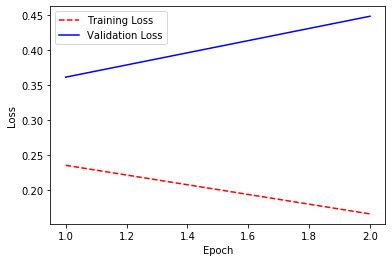

In [ ]:
import matplotlib.pyplot as plt

# Create count of the number of epochs
epoch_count = range(1, len(history.history['loss']) + 1)

# Visualize learning curve. Here learning curve is not ideal. It should be much smoother as it decreases.
#As mentioned before, altering different hyper parameters especially learning rate can have a positive impact
#on accuracy and learning curve.
plt.plot(epoch_count, history.history['loss'], 'r--')
plt.plot(epoch_count, history.history['val_loss'], 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
#make the predictions with trained model and submit the predictions.
y_pred=model.predict_classes(X_test)

sub_file = pd.read_csv('sample.csv',sep=',')
sub_file.Class=y_pred
sub_file.to_csv('Submission_7.csv',index=False)

In [ ]:
sub_file.head()

,ID,Class
0,9348,0
1,9393,1
2,8557,1
3,9288,1
4,9231,1


In [ ]:
len(sub_file)

1425